# Lightkurve citation stats

This notebook uses NASA's ADS service to identify publications that mention the string "Lightkurve".

In [1]:
import ads
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
FIELDS = ['date', 'pub', 'id', 'volume', 'links_data', 'citation', 'doi',       
          'eid', 'keyword_schema', 'citation_count', 'data', 'data_facet',      
          'year', 'identifier', 'keyword_norm', 'reference', 'abstract', 'recid',
          'alternate_bibcode', 'arxiv_class', 'bibcode', 'first_author_norm',   
          'pubdate', 'reader', 'doctype', 'doctype_facet_hier', 'title', 'pub_raw', 'property',
          'author', 'email', 'orcid', 'keyword', 'author_norm',                 
          'cite_read_boost', 'database', 'classic_factor', 'ack', 'page',       
          'first_author', 'reader', 'read_count', 'indexstamp', 'issue', 'keyword_facet',
          'aff', 'facility', 'simbid']

In [3]:
qry = ads.SearchQuery(q='full:"lightkurve" AND year:2017-2050', rows=999999, fl=FIELDS)

In [4]:
papers = [q for q in qry ]

/home/gb/bin/anaconda/lib/python3.8/site-packages/ads-0.12.3-py3.8.egg/ads/search.py:543: UserWarning: Response rows did not match input rows. Setting this query's rows to 2000


In [5]:
dates = [p.date for p in papers[::-1]]
titles = [p.title[0] for p in papers[::-1]]
years = [p.year for p in papers[::-1]]
authors = [p.first_author_norm for p in papers[::-1]]
bibcodes = [p.bibcode for p in papers[::-1]]
pubs = [p.pub for p in papers[::-1]]

In [6]:
df = pd.DataFrame({'year': years,
                   'date': pd.to_datetime(dates),
                   'title': titles,
                   'author': authors,
                   'bibcode': bibcodes,
                   'pub': pubs})
# Filter out Zenodo entries and AAS Abstracts
mask = ~df.pub.str.contains("(Zenodo)|(Abstracts)")
# Sort by date and reset index
df = df[mask].sort_values('date', ascending=False).reset_index(drop=True)

/home/gb/bin/anaconda/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [7]:
df

,year,date,title,author,bibcode,pub
0,2020,2020-06-01 00:00:00+00:00,TESS photometry of extreme helium stars PV Tel...,"Jeffery, C",2020arXiv200600946J,arXiv e-prints
1,2020,2020-06-01 00:00:00+00:00,The one that got away: A unique eclipse in the...,"Scholz, A",2020arXiv200603582S,arXiv e-prints
2,2020,2020-06-01 00:00:00+00:00,A search for young exoplanets in Sectors 1-5 o...,"Battley, M",2020arXiv200601721B,arXiv e-prints
3,2020,2020-06-01 00:00:00+00:00,TOI-1338: TESS' First Transiting Circumbinary ...,"Kostov, V",2020AJ....159..253K,The Astronomical Journal
4,2020,2020-05-01 00:00:00+00:00,K2 Ultracool Dwarfs Survey - VI. White light s...,"Paudel, R",2020MNRAS.494.5751P,Monthly Notices of the Royal Astronomical Society
...,...,...,...,...,...,...
79,2019,2019-02-01 00:00:00+00:00,Flares in open clusters with K2 . I. M 45 (Ple...,"Ilin, E",2019A&A...622A.133I,Astronomy and Astrophysics
80,2019,2019-01-01 00:00:00+00:00,A Transiting Hot Jupiter Candidate toward the ...,"Hedges, C",2019RNAAS...3...18H,Research Notes of the American Astronomical So...
81,2018,2018-12-01 00:00:00+00:00,Lightkurve: Kepler and TESS time series analys...,Lightkurve Collaboration,2018ascl.soft12013L,Astrophysics Source Code Library
82,2018,2018-10-01 00:00:00+00:00,No Optimal SFF Motion Detrending Parameters fo...,"Zhang, J",2018RNAAS...2..182Z,Research Notes of the American Astronomical So...


In [8]:
df.to_csv("publications-using-lightkurve.csv")

## Create a plot

In [9]:
x = pd.date_range('2018-01-01T00:00:00Z', '2020-06-01T00:00:00Z', freq='1M')

In [10]:
y = [len(df[df.date < d]) for d in x]

In [17]:
# Load fancy style options
import matplotlib
import matplotlib.pyplot as pl
pl.style.use("fivethirtyeight")
style = {'font.family': 'Open Sans',
         'font.weight': 300,
         'figure.figsize': (6, 3),
         'figure.dpi': 200,
         'figure.facecolor': 'white',
         'axes.facecolor': 'white',
         'font.size': 9,
         'axes.edgecolor': 'white',
         'savefig.facecolor': 'white'}
matplotlib.rcParams.update(style)

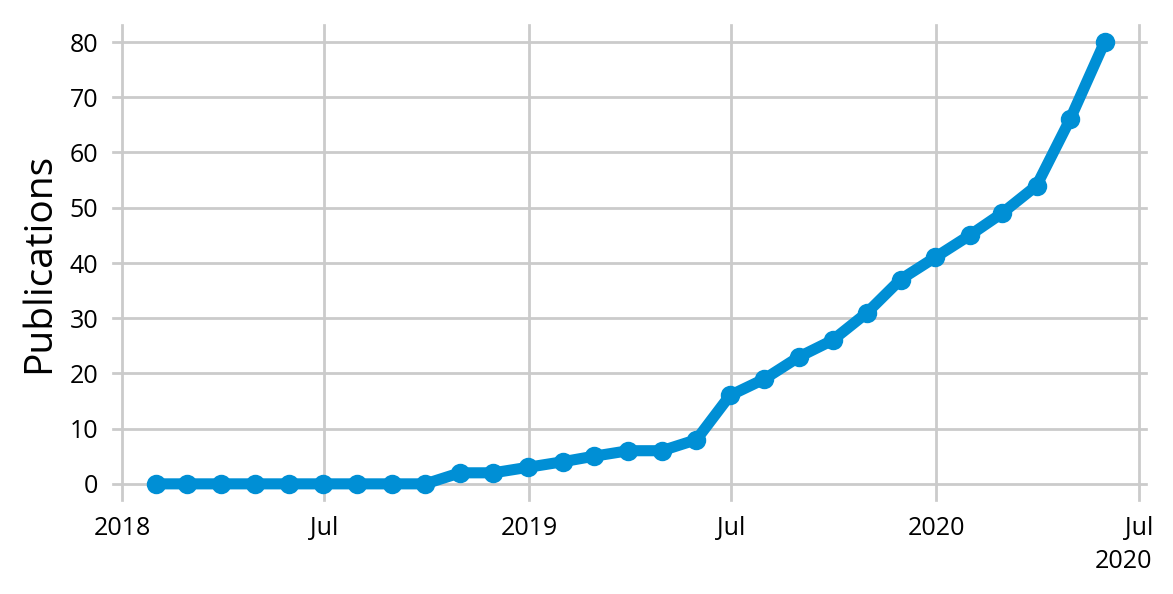

In [18]:
fig, ax = plt.subplots()
plt.plot(x, y, marker='o')
plt.ylabel("Publications", fontsize=14)
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.savefig("lightkurve-publications.pdf")

In [15]:
dfano = pd.read_csv("papers-using-lightkurve-annotated.csv")

FileNotFoundError: [Errno 2] File papers-using-lightkurve-annotated.csv does not exist: 'papers-using-lightkurve-annotated.csv'

In [ ]:
100* dfano.category.value_counts() / len(dfano)